## EE 461P: Data Science Principles  
### Homework 4 
### Total points: 90
### Due:  submitted via Canvas by March 30 11:59 pm  

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UT eID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TAs know.

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

### Name(s) and EID(s):
1. Sidharth Babu, SNB2593
2. Laith Altarabishi, la26744

### Homework group No.: 

## Q1. Bayes Optimal Classifier (15 points)
Consider a binary classification problem with the following loss matrix -
$$
   {\begin{array}{ccccc}
   & & \text{Predicted class} & \text{           } &\\
   & & C1 & C2 & Reject\\
   \text{True class} & C1 & 0 & 3 & c  \\
   & C2 & 2 & 0 & c \\
  \end{array} } 
$$
where the cost of rejection is a constant. Determine the prediction that minimizes the expected loss in different ranges of $P(C1|x)$ for the following three cases - 
1. c = 0
2. c = 2
3. c = 1

Hint : Think and work out the bayes classifier as studied in slides aml-classification1.pdf.

Expected loss for each action:

$Loss_C1 = 0 * P(C1|x) + 2 * P(C2|x)$ <br>
$Loss_C1 = 2 * (1 - P(C1|x))$ <br>
$Loss_C2 = 3 * P(C1|x) + 0 * P(C2|x)$ <br>
$Loss_C2 = 3 * P(C1|x)$ <br>
$Loss_Reject = c$ <br>

## Case C = 0:

We set inequalities of Loss_C1 = Loss_C2

$2 * (1 - P(C1|x)) = 3 * P(C1|x)$ <br>
$2 - 2P(C1|x) = 3*P(C1|x)$ <br>
$P(C1|x) = \frac{2}{5}$

To minimize loss we predict C1 for $P(C1|x) > \frac{2}{5}$ and C2 otherwise. However, since our rejection cost is always 0, then we cannot conceivably reduce our loss less than 0 - since all of our loss functions are nonnegative. Thus for this case we always reject.

## Case C = 2:

Now to predict C1 we satisfy the following:

$Loss_C1 < Loss_C2$ and $Loss_C1 < 2$ <br>
$2 - 2P(C1|x) < 3 * P(C1|x)$ and $2 * (1 - P(C1|x)) < 2$ <br>
$\frac{2}{5} < P(C1|x)$ and $(1 - P(C1|x)) < 1$ => $P(C1|x) > 0$

Now to predict C2 we satisy:

$3 * P(C1|x) < 2 - 2P(C1|x)$ and $3 * P(C1|x) < 2$ <br>
$P(C1|x) < \frac{2}{5}$ and $P(C1|x) < \frac{2}{3}$

Thus for our decision boundry we say,

if P(C1|x) > $\frac{2}{3}$ - predict C1 <br>
else if $\frac{2}{3}$ > P(C1|x) > $\frac{2}{5}$ predict either C1 or c2 <br>
else predict C2

## Case C = 1:

To predict C1 we satisy:

$\frac{2}{5} < P(C1|x)$ and $2 * (1 - P(C1|x)) < 1$ => $P(C1|x) > \frac{1}{2}$

To predict C2 we satisfy:

$3 * P(C1|x) < 2 - 2P(C1|x)$ and $3 * P(C1|x) < 1$ <br>
$P(C1|x) < \frac{2}{5}$ and $P(C1|x) < \frac{1}{3}$

Thus for our decision boundry we decide:

if P(C1|x) > $\frac{2}{5}$ predict C1 <br>
else if $\frac{1}{3}$ < P(C1|x) < $\frac{2}{5}$ reject <br>
else predict C2

## Q2. PCA (25 points)

MNIST is a dataset consisting images of digits (0-9). Load the dataset from `mnist.csv`. Then standardise the datasets using StandardScaler from `sklearn.preprocessing` library.

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.linalg import eigh
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('mnist.csv')
labels =  dataset['label']
dataset = dataset.drop('label', axis=1)
print(dataset.shape)
print(labels.shape)

(42000, 784)
(42000,)


In [3]:
scaler = StandardScaler()
scaled_dataset = scaler.fit_transform(dataset)

2.1 Now, do PCA and get 2 principal components of the data by performing following steps (10 points):
  

*   Create a covariance matrix of the scaled data
*   Obtain the two eigen vectors of the covariance matrix corresponding to the highest two eigen values
*   Project the scaled data onto these eigen vectors to obtain a 2-dimesnional representation of the instances in the data





In [4]:
print(scaled_dataset.shape)

(42000, 784)


In [5]:
class PCA():
  def __init__(self):
    self.eigen_vectors = None
    self.eigen_values = None
    self.covmat = None

  def fit(self, X, k):
    ## code for getting the eigen vectors from the data
    self.covmat = np.cov(X.T)
    _eigen_values, _eigen_vectors = eigh(self.covmat, eigvals=(X.shape[1] - k, X.shape[1]-1))
    self.eigen_values = _eigen_values
    self.eigen_vectors = _eigen_vectors
    return self
  
  def get_principal_components(self, k):
    ## code for obtaining eigen vectors corresponding to the top-k eigen values
    return (self.eigen_vectors.T[::-1])[0:k].T


  def transform(self, data, k):
    ## code for getting projections on the determined principal components
    proj_vectors = self.get_principal_components(k)
    return np.dot(data, proj_vectors)


In [6]:
pca = PCA()
pca.fit(scaled_dataset,2)
pca_data = pca.transform(scaled_dataset, 2)
print(pca_data.shape)
print(scaled_dataset.shape)

(42000, 2)
(42000, 784)


2.2 Select the points from the train dataset corresponding to class 0 and 7 and plot their 2-D projections as obtained in the previous step (5 points). 




In [7]:
labels = np.reshape(labels.values, (labels.shape[0], 1))
print(labels.shape)
labels = pd.DataFrame(labels)
print(labels.shape)
pca_data = pd.concat([labels, pd.DataFrame(pca_data)], axis=1)
print(pca_data.shape)
pca_data.columns = ['label', '1st_principal_component', '2nd_principal_component']
pca_data.head()

(42000, 1)
(42000, 1)
(42000, 3)


,label,1st_principal_component,2nd_principal_component
0,1,-5.140478,-5.226445
1,0,19.292332,6.032996
2,1,-7.644503,-1.705813
3,4,-0.474207,5.836139
4,0,26.559574,6.024818


In [8]:
classes07 = pca_data[pca_data['label'].isin([0,7])]
classes07.reset_index(drop=True, inplace=True)
classes07.head()

,label,1st_principal_component,2nd_principal_component
0,0,19.292332,6.032996
1,0,26.559574,6.024818
2,0,1.269197,-0.713788
3,7,-6.139613,6.028416
4,0,8.393430,-10.119340


<AxesSubplot:xlabel='1st_principal_component', ylabel='2nd_principal_component'>

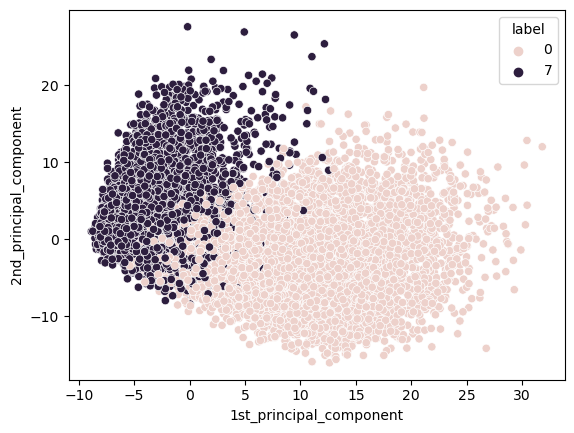

In [9]:
sn.scatterplot(x='1st_principal_component', y='2nd_principal_component', hue='label', data=classes07)

2.3 Now partition the dataset into a train and test dataset by doing a 75/25 split. Learn the principal components on the train dataset (after scaling) for number of components in [2, 10, 100]. Use the learnt principal components to obtain projections for both train and test dataset (total 3 train/test pairs, 2-D, 10-D and 100-D). Train one LogisticRegression(random_state=4,max_iter=10000) model for each of the reduced dimesnional space (2-D, 10-D and 100-D). Print the classification reports on test dataset for all the models -  this will print the class-wise Precision, Recall and F1 score. More details on classification report can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html). (10 points)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
dataset = pd.read_csv('mnist.csv')
Y = dataset['label']
X = dataset.drop(['label'], axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, shuffle=True, random_state=42)
scaled_train = scaler.fit_transform(X_train)
scaled_test = scaler.fit_transform(X_test)

In [11]:
p = PCA().fit(scaled_train,784)
scaled_train_pca_sets = [p.transform(scaled_train, i) for i in [2,10,100]]
scaled_test_pca_sets = [p.transform(scaled_test, i) for i in [2,10,100]]
regressions = [LogisticRegression(random_state=4, max_iter=10000).fit(scaled_train_pca_sets[i], Y_train) for i in range(3)]

In [12]:
from sklearn.metrics import classification_report
reports = [classification_report(Y_test, regressions[i].predict(scaled_test_pca_sets[i])) for i in range(len(scaled_test_pca_sets))]

In [13]:
c = [2,10,100]
for i in range(3):
    print(f'Num Components: {c[i]}')
    print(reports[i])

Num Components: 2
              precision    recall  f1-score   support

           0       0.55      0.74      0.63      1025
           1       0.65      0.93      0.77      1146
           2       0.25      0.21      0.22      1072
           3       0.17      0.11      0.14      1151
           4       0.18      0.17      0.17      1024
           5       0.33      0.01      0.02       898
           6       0.15      0.11      0.13      1010
           7       0.39      0.56      0.46      1135
           8       0.20      0.34      0.25      1005
           9       0.17      0.12      0.14      1034

    accuracy                           0.34     10500
   macro avg       0.30      0.33      0.29     10500
weighted avg       0.31      0.34      0.30     10500

Num Components: 10
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      1025
           1       0.87      0.96      0.91      1146
           2       0.82      0.77      0.

## Answer:

# Q3 Feature Selection (25 points)

1. Explain in your own words what forward and backward feature selection methods are, and their pros and cons. (5 points)
2. Use the [feature selection](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html) module from sklearn to select features using Decision Trees on the first 20 features of the [breast_cancer dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html). Do forward and backward feature selection and print what features are being selected. Use `n_features='auto'` and see how many features are being selected. (15 points)
4. Briefly explain the results you have obtained. (5 points)

### 1)
Forward feature selection is the process of iteratively adding more and more of your set of features, by evaluating the best performing features first and retaining features as you add them along. Backward feature selection is in some sense the opposite, since you will start with all of your features and iteratively remove features one at a time - minimizing your loss in performance/improving your performance as you go along. The pros of Forward feature selection is that you are able to significantly reduce large feature spaces, and you are able to extract your most imporant features from a dataset without having to deal with the complexity of too many features. This is also a big con for backward feature selection since you are having to start in a very large and complex feature space that may take many iterations to see performance improvements. On the other hand, for feature spaces that are not too large where you may only need to filter a few features out - backward selection is likely to be more suitable than forward selection since you will want to retain most of the features you have and you won't need to iterate as many steps to find your optimal feature space. 

### 2)
-----

In [14]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

data = load_breast_cancer()
X = data.data[:, :20] # Use the first 20 features
y = data.target
feature_names = data.feature_names[:20]

In [20]:
[','.join(s.get_feature_names_out(feature_names)) for s in [SequentialFeatureSelector(DecisionTreeClassifier(),n_features_to_select='auto',direction=d).fit(X,y) for d in ['forward','backward']]]

ValueError: n_features_to_select must be either None, an integer in [1, n_features - 1] representing the absolute number of features, or a float in (0, 1] representing a percentage of features to select. Got auto

### 3)
-----

# Answer:

## Q4. Classification using Decision Trees and MLP (25 points)

Use the example provided [here](https://scikit-learn.org/stable/modules/tree.html) to get an idea of how to use sklearn's decision tree classifier.

1. Load the dataset provided in [`spambase.data`](https://drive.google.com/file/d/1Vl2HOc9UAxJuwXabUmOJc8sQv8F57QfB/view?usp=sharing) and use scikit-learn to create a train-test split as shown.
2. Train a decision tree model on the training dataset and report the [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) and the [ROC-AUC curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) on the test set. (10 points) 
3. Train an [MLP classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) with the default parameters and report the confusion matrix and ROC-AUC curve on the test set. (10 points)
4. Note your observations on the performance of the 2 models. (5 points)   


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve
from sklearn import metrics

data = pd.read_csv('spambase.data')

X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['label']), 
                                                    data[['label']], 
                                                    test_size=0.2, 
                                                    random_state=42)

# Answer:

c:\Users\laith\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[<AxesSubplot:>, <AxesSubplot:>]

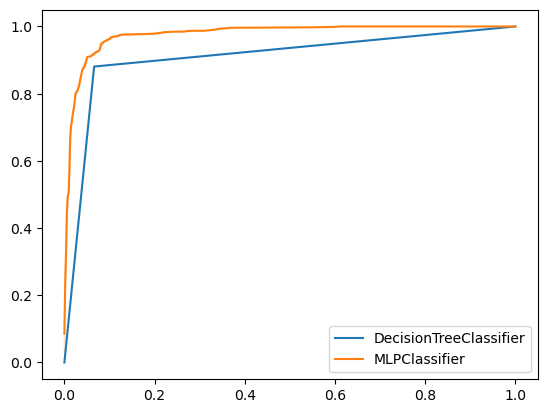

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

estimators = [DecisionTreeClassifier(), MLPClassifier()]
estimators = [estimator.fit(X_train, y_train) for estimator in estimators]
cmats = [confusion_matrix(y_test, estimator.predict(X_test)) for estimator in estimators]
roc_curves = [roc_curve(y_test, [x[1] for x in estimator.predict_proba(X_test)]) for estimator in estimators]
[sn.lineplot(x=roc_curves[i][0], y=roc_curves[i][1], label=estimators[i].__class__.__name__) for i in range(len(estimators))]

<Figure size 640x480 with 0 Axes>

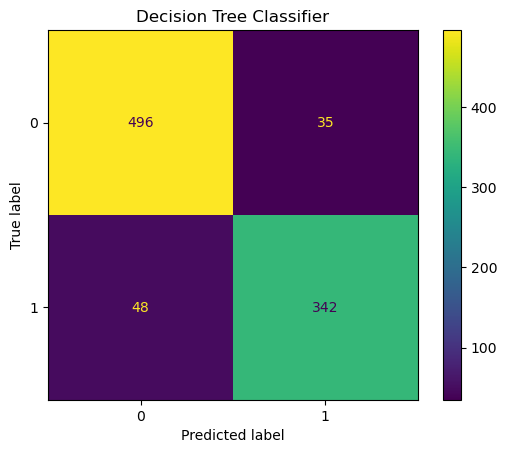

<Figure size 640x480 with 0 Axes>

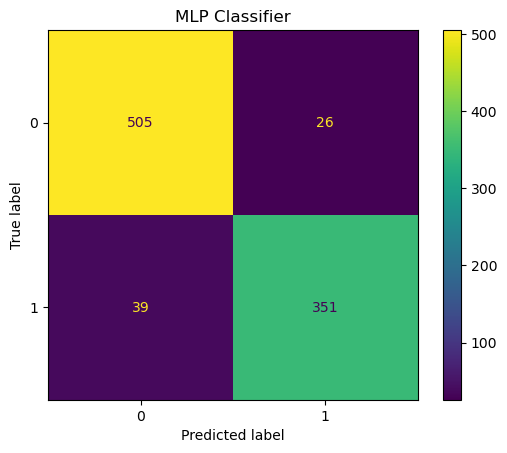

[None, None]

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay
def confdisp(cmat,title):
    plt.figure()
    ConfusionMatrixDisplay(cmat).plot()
    plt.title(title)
    plt.show()

[confdisp(cmat, ("Decision Tree Classifier" if cmat is cmats[0] else "MLP Classifier")) for cmat in cmats]

Observations: The MLP classifer seems to outperform the decision tree classifier consistently - as it has a better ROC score as well having less false positives and negatives in it's confusion matrix. We can tell it has a better ROC performance since it's curve is closer to the ideal ROC curve.